#### DBSCAN算法

`sklearn.cluster.DBSCAN`的主要参数：
- eps: 邻域半径，默认值 = 0.5
- min_samples: 可将一个点视为核心点的邻域中样本数的最小值，默认值 = 5
- metric：距离计算方式，默认值 = 'euclidean'

[sklearn.cluster.DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

DBSCAN聚类效果（默认参数）：

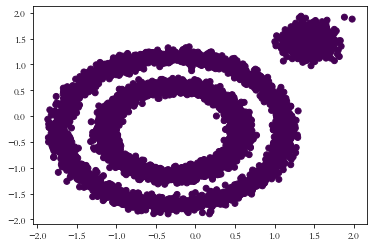

In [153]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles, make_blobs
from sklearn import preprocessing

rs = 100
X1, y1 = make_circles(n_samples=5000, factor=0.6, noise=0.05, random_state=rs)
X2, y2 = make_blobs(n_samples=1000, n_features=2, centers=[[1.2, 1.2]], cluster_std=[[.1]], random_state=rs)
X = np.r_[X1, X2]

X = preprocessing.StandardScaler().fit_transform(X)

y_pred = DBSCAN().fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

DBscan聚类效果（调参）：

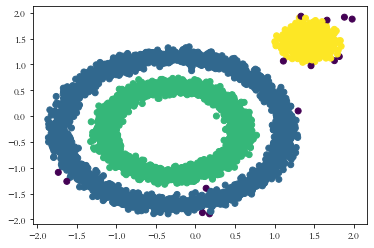

In [154]:
y_pred = DBSCAN(eps=0.1, min_samples=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

Exercise3：

    1. 你认为k-means算法与dbscan算法的适用场景分别是什么？
    
    2.1. 在k-means聚类的例子中如何选取合适的k？
    2.2. 在dbscan聚类的例子中如何选取合适的eps和min_samples？
    编写代码并结合课件上的相关内容对上述问题进行解释。

#### 层次聚类算法实现

`sklearn.cluster.AgglomerativeClustering`的主要参数：
- n_clusters：聚类的个数
- affinity：计算距离的方法，若linkage=“ward”，则只能选择 “euclidean”
    - “euclidean”（即 “l2”，欧氏距离）
    - “manhattan”（即 “l1”，曼哈顿距离，有利于稀疏特征或稀疏噪声，例如文本挖掘中使用稀有词的出现作为特征时，会出现许多 0）
    - “cosine”（余弦距离） 
- linkage：指定层次聚类判断相似度的方法，有以下三种：
    - ward：组间距离等于两类对象之间的最小距离。（即single-linkage聚类）
    - average：组间距离等于两组对象之间的平均距离。（average-linkage聚类）
    - complete：组间距离等于两组对象之间的最大距离。（complete-linkage聚类）

[sklearn.cluster.AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html?highlight=agglomerativeclustering#sklearn.cluster.AgglomerativeClustering)
    
**亦可通过scipy.cluster实现k-means聚类及层次聚类，请大家自行探索。**


导入所需的模块及数据，这里我们使用iris数据集，为方便可视化，选取iris数据集的前50个样本及第二和第三个特征：

In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

## 导入数据
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
# print(iris_data)

## 数据预处理
from sklearn import preprocessing

data = np.array(iris_data[:50, [1,2]]) # 这里我们选取iris数据的前50个样本以及第二和第三个特征（为了方便可视化）
data = preprocessing.MinMaxScaler().fit_transform(data)
# print(data)

利用`scipy.cluster.hierarchy`进行层次聚类并可视化：

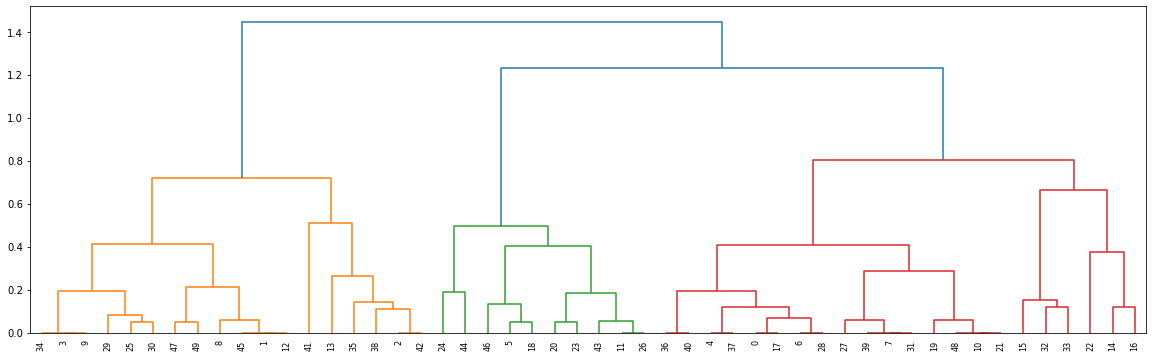

In [2]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster # 导入scipy.cluster.hierarchy模块实现层次聚类

plt.figure(figsize=(20,6))
Z = linkage(data, method='ward', metric='euclidean') # 执行层次聚类，返回linkage matrix, ward: single-linkage聚类
dn = dendrogram(Z) # 绘图
plt.show()

In [5]:
from sklearn.preprocessing import LabelEncoder # 标准化label

f = fcluster(Z, 3, 'maxclust') # 将分层聚类转化为平面聚类输出，可通过指定fcluster的参数限制输出的cluster数量
print(LabelEncoder().fit_transform(f))

[2 0 0 0 2 1 2 2 0 0 2 1 0 0 2 2 2 2 1 2 1 2 2 1 1 0 1 2 2 0 0 2 2 2 0 0 2
 2 0 2 2 0 0 1 1 0 1 0 2 0]


利用`sklearn.cluster.AgglomerativeClustering`实现层次聚类：

In [6]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = ac.fit_predict(data)
print(LabelEncoder().fit_transform(labels))

[0 1 1 1 0 2 0 0 1 1 0 2 1 1 0 0 0 0 2 0 2 0 0 2 2 1 2 0 0 1 1 0 0 0 1 1 0
 0 1 0 0 1 1 2 2 1 2 1 0 1]


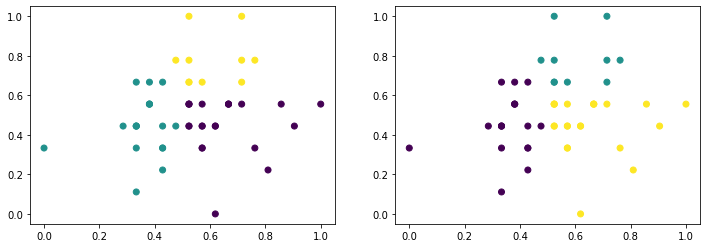

In [7]:
## 比较sklearn和scipy实现层次聚类的结果
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.scatter(data[:,0], data[:,1], c=labels)
plt.subplot(1,2,2)
plt.scatter(data[:,0], data[:,1], c=f)
plt.show()

之前的例子中我们为了方便可视化从iris数据集里选取了两个特征，通常我们遇到的样本包含多个特征，应当如何可视化聚类结果？

In [10]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

## 导入数据
from sklearn import datasets

iris = datasets.load_iris()
iris_data = iris.data
# print(iris_data)

## 数据预处理
from sklearn import preprocessing

data = preprocessing.MinMaxScaler().fit_transform(iris_data)  #仅对iris作归一化，未选取特征
# print(data)

## 层次聚类
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = ac.fit_predict(data)

iris数据集包含四个特征，为方便可视化需对数据进行降维：

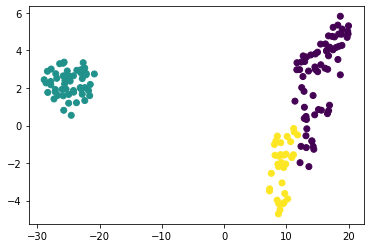

In [11]:
## 将高维数据的聚类结果降维输出（基于t-SNE的非线性降维）
from sklearn.manifold import TSNE

data_tsne = TSNE(n_components=2, init='pca',).fit_transform(data)
plt.scatter(data_tsne[:,0], data_tsne[:,1], c = labels)

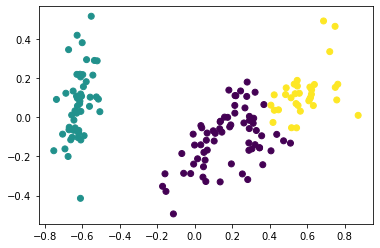

In [12]:
## 将高维数据的聚类结果降维输出（基于PCA的线性降维）
from sklearn.decomposition import PCA

data_pca = PCA(n_components=2).fit_transform(data)
plt.scatter(data_pca[:,0], data_pca[:,1], c = labels)